In [1]:
#Step2e_DecodingAccuracy_Graphing.ipynp
import h5py,pkg_resources,sys,scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import seaborn as sns
# from wbplot import pscalar

import os,glob,warnings,shutil
import pandas as pd
import numpy as np
from scipy import signal, stats
import statsmodels.api as sm
from statsmodels.stats.multitest import fdrcorrection
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multitest import multipletests

#read out matrices to files
import io

#Parallel loop
from concurrent.futures import ProcessPoolExecutor
from joblib import Parallel, delayed


In [2]:
from scipy import signal, stats
from scipy.stats import sem
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [35]:
#Python single decoder group results 
#Name basic variables 
runFrom = 'cpro2_eeg' #fnd4 or cpro2_eeg
dataType = 'RawSensor' #sensor or source
classify_cond = ['Left','Right', 'Hand']


#Name directories 
inputDir_2 = 'results/DynamicDecoding/RawSensor/'
outputDir_1 = 'results/DynamicDecoding/RawSensor/Group_Results/'
if runFrom =='FND4':
    baseDir = '/home/let83/FND4/'
else:
    baseDir = '/projectsn/f_mc1689_1/cpro2_eeg/data/'

#Write function to plot left or right hand data
def plotAvgDecoder(decoderType, subjects, outputDir_1, cond,ind):
    #Load in data
    inputPrefix = f'_SubjectDecoding_10fold_{cond}_correctOnly_noPseudoTrials.csv'
    inputDir = f'{baseDir}{inputDir_2}{decoderType}/{cond}/DecodingAccuracy/'
    outputDir = f'{baseDir}{outputDir_1}'
    total_acc = pd.DataFrame()
    for subj in subjects:
        path = f'{inputDir}{subj}{inputPrefix}'
        newAcc = pd.read_csv(f'{path}')
        # print(path)
        new_row = newAcc.T
        total_acc = pd.concat([total_acc, new_row], ignore_index=True)
    #Determine which, if any, time points have decoding accuracies significantly different from chance
    significant_points = []
    chance = 0.5
    for col_names in total_acc.columns:
        time_point = total_acc[col_names]
        t, p = stats.ttest_1samp(time_point, chance)
        significant_points.append(p)
    _, significant_points_corr, _, _ = multipletests(significant_points, method='fdr_bh')
    
    #Find average and standard error of accuracy across subjects
    avg_acc = list(total_acc.mean(axis=0))
    sem_acc = list(sem(total_acc, axis=0, nan_policy='omit'))
    
    #Plot
    outfile = f'{decoderType}_{inputPrefix}GroupPlot_{cond}_Decoding.png'
    c = ['steelblue','mediumorchid','seagreen']
    c1 = ['lightskyblue','violet','mediumseagreen']
    x = np.linspace(-0.09,3.855,len(avg_acc))
    y = np.array(avg_acc)
    y_err= np.array(sem_acc)
    y_min = 0.4
    y_max = 0.9
    plt.grid
    plt.figure(figsize=(14,9))
    plt.plot(x,y,color=c[ind],linewidth=1)
    plt.fill_between(x, y-y_err, y+y_err, alpha=0.6, color=c1[ind])
    if cond=='Hand':
        plt.title(f'Average Accuracy of Hand\n {decoderType} Decoding Across Subjects', fontsize=15)
    else:
        plt.title(f'Average Accuracy of {cond} Hand\nFinger {decoderType} Decoding Across Subjects', fontsize=15)
    #Mark time points that have significant accuracy across subjects
    for i in range(len(significant_points_corr)):
        if significant_points_corr[i]<=0.05:
            plt.scatter(x[i],0.45,size=1)
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Decoding Accuracy', fontsize=15)
    plt.ylim(y_min, y_max)
    plt.savefig(os.path.join(outputDir, outfile))
    plt.show()
    


(10, 494)


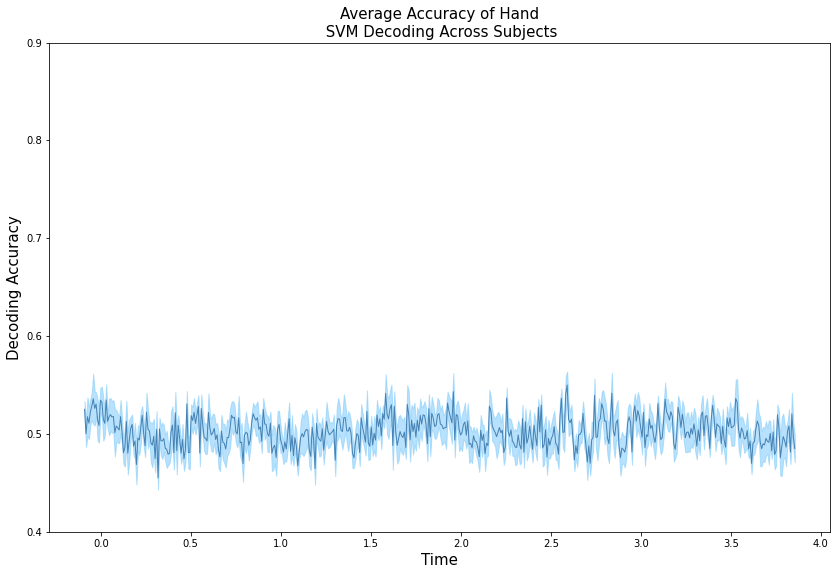

(10, 494)


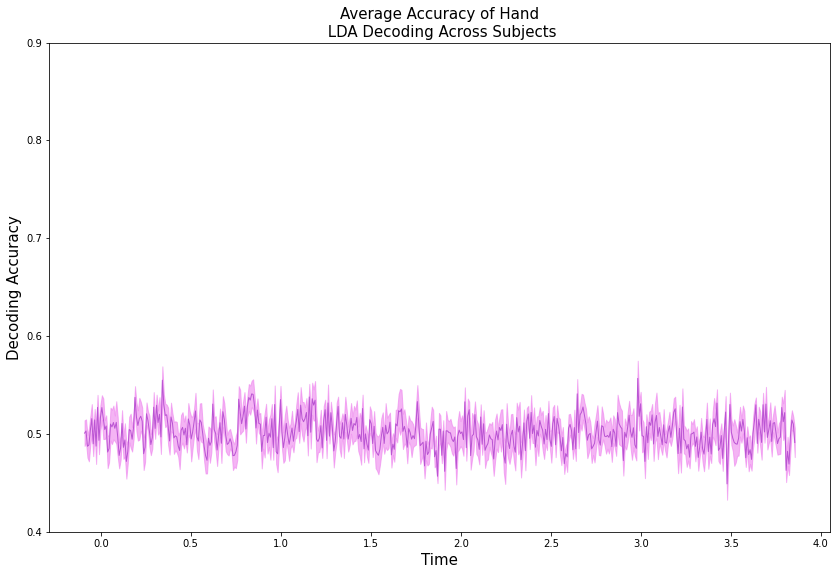

(10, 494)


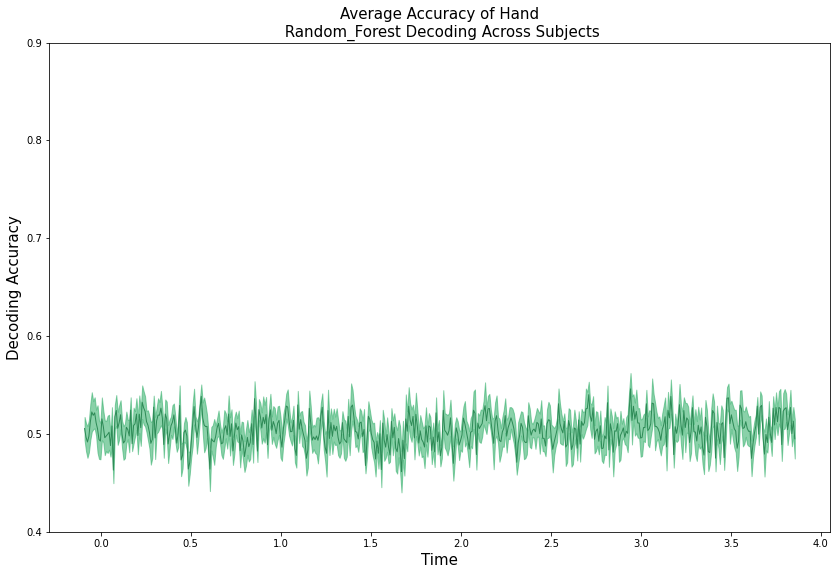

(10, 494)


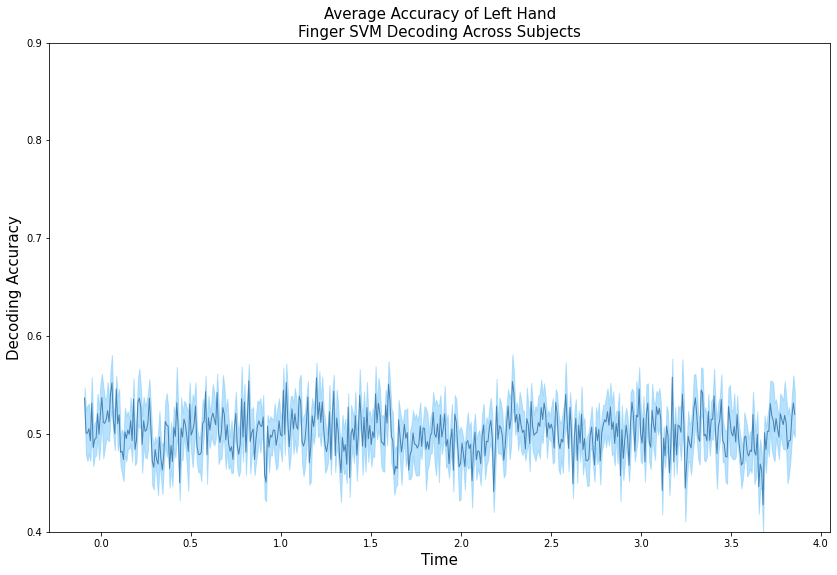

(10, 494)


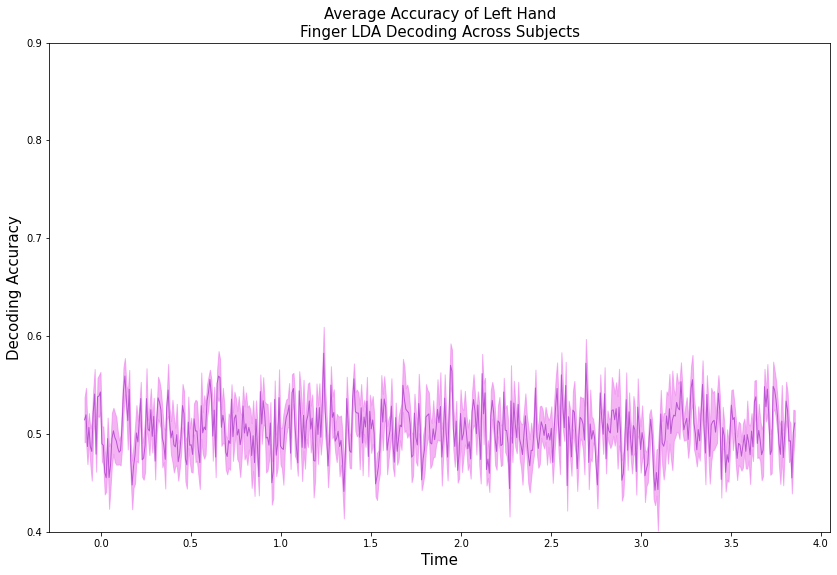

(10, 494)


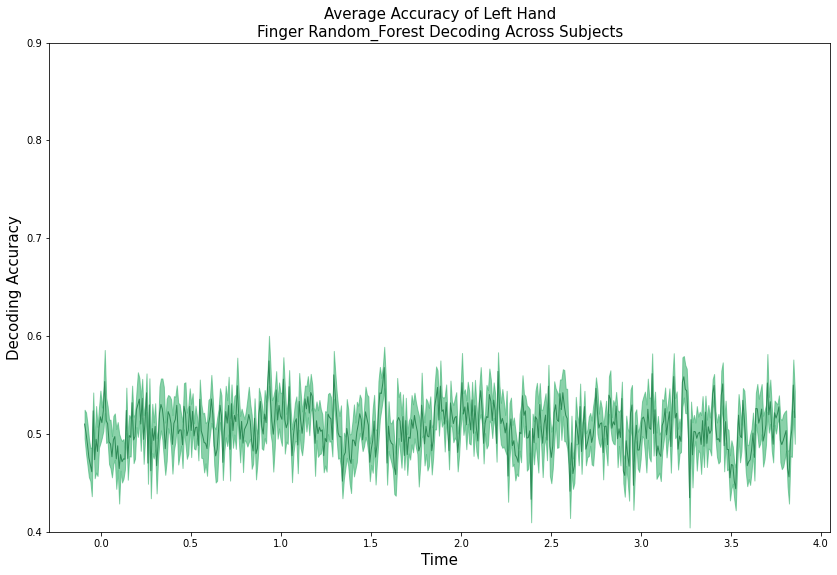

(10, 494)


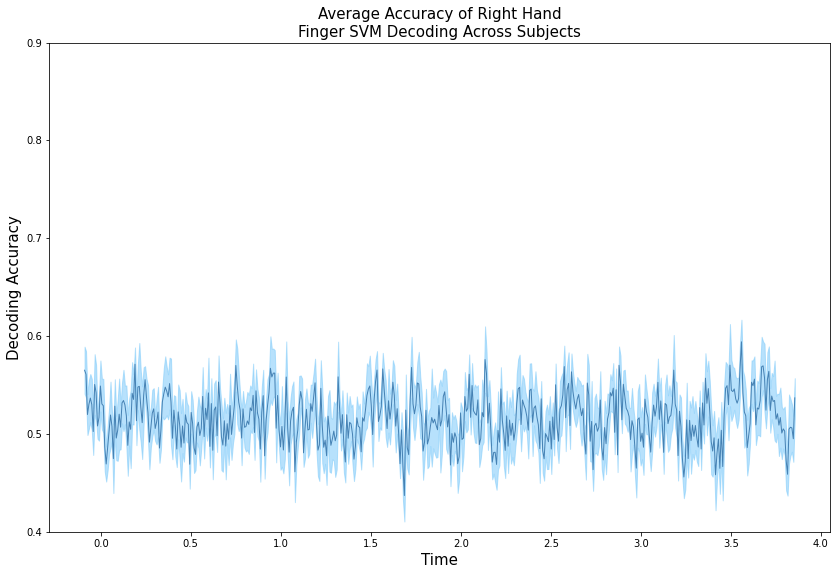

(10, 494)


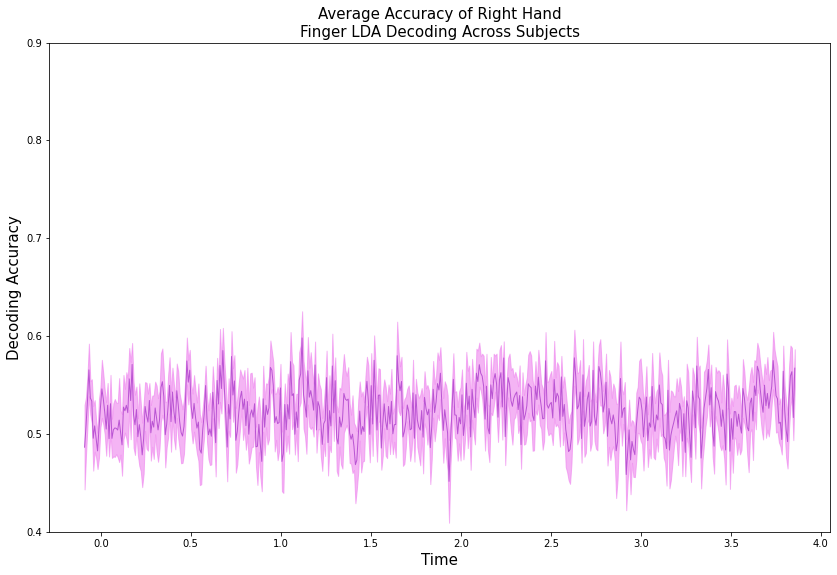

(10, 494)


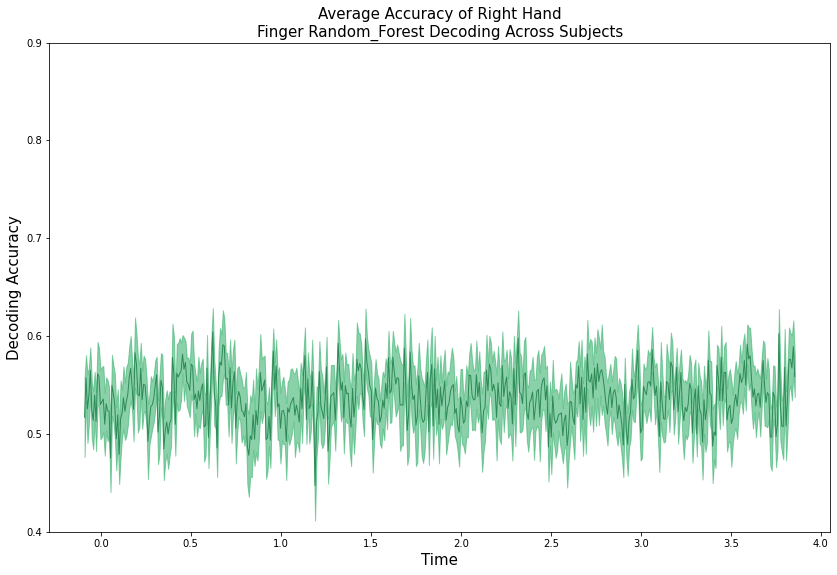

In [36]:
conditions = ['Hand','Left','Right']
subjects = [1,2,3,5,10,16,17,21,34,44]
decoderType='Random_Forest'
# plt.figure(figsize=(14,9))
decoderTypes = ['SVM', 'LDA', 'Random_Forest']

for cond in conditions:
    ind=-1
    for decoderType in decoderTypes:
        ind+=1
        plotAvgDecoder(decoderType, subjects, outputDir_1, cond, ind)